In [3]:
from adios2toolspy import SuperCell, Particles, Fields
from h5toolspy import getH5Grid, selectSubSpace
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 8]

## Full Grid B

## Pick Domain
y: point on x-axis, z: point on y-axis

Loading hx_fc from File: tfd.017000.xdmf


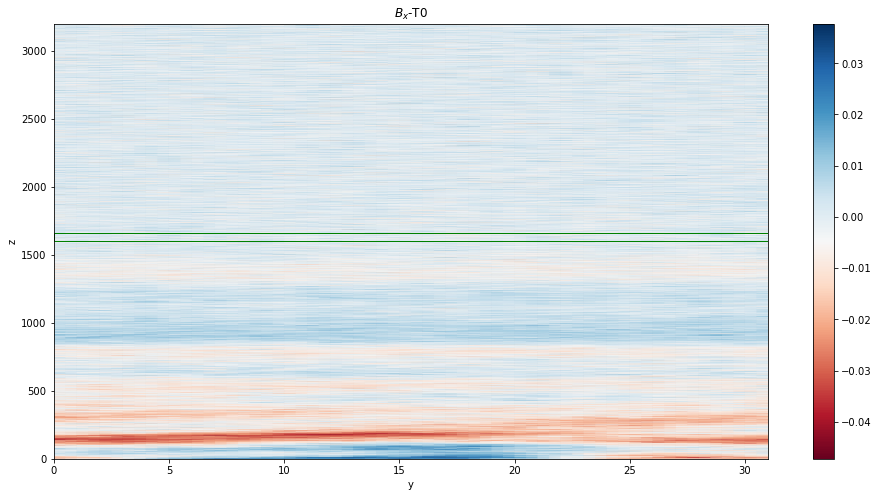

In [4]:
root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-5/ratio001NoCollision/' #0.01
#root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-19/Test1D050/' #0.5
#root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-21/Test1D050NoCollisions/' #0.5
#root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-22/Test1Dratio00/' #0.0

globalDims = (1, 32, 2*1600)
corner = (0, 0, 2*1600)
numPatches=2
cellsPerPatch=32

time = -1

bx = getH5Grid(root, 'tfd', 'hx_fc', time, corner=corner, dims=globalDims)[:,:,0]
plt.title(f'$B_x$-T{time+1}')
plt.ylabel('z')
plt.xlabel('y')
plt.pcolormesh(bx, cmap='RdBu', shading='gouraud')
plt.colorbar()
xp = 0
yp = 0
zp = 1600
box = selectSubSpace(yp, zp, numPatches=numPatches)

In [15]:
nbins = 100
histograms_e = []
bins_e = []

histograms_he = []
bins_he = []
patch = np.array(corner) + np.array((xp, yp, zp))

for time in range(1000, 10000,1000):
    path = root + 'checkpoint_' + str(time) + '.bp'
    SC = SuperCell(path, patch, patches=numPatches, species='electron')
    h = SC.histogramV(nbins, log=True, dim='s')
    histograms_e.append(h[0])
    bins_e.append(h[1][1:])
    
    SC_he = SuperCell(path, patch, patches=numPatches, species='electron_he')
    h_he = SC_he.histogramV(nbins, log=True, dim='s')
    histograms_he.append(h_he[0])
    bins_he.append(h_he[1][1:])


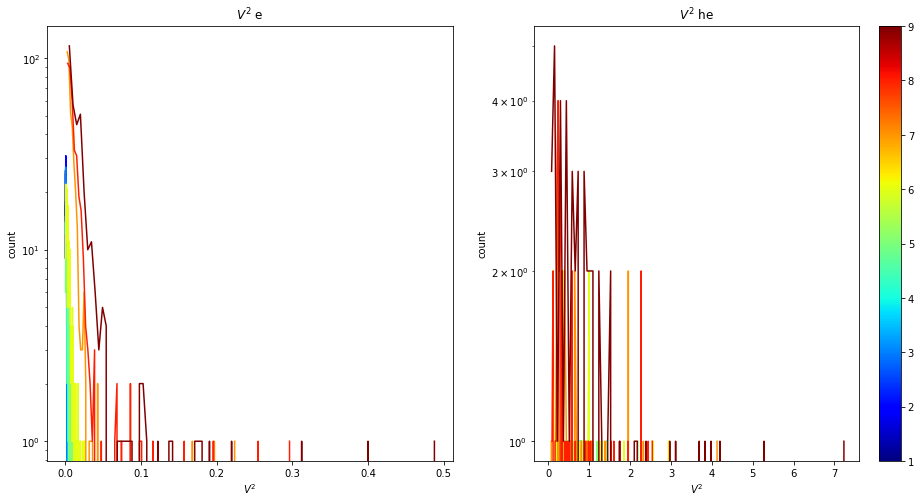

In [16]:
c = np.arange(1, len(histograms_e) + 1)
norm = matplotlib.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.jet)
cmap.set_array([])

fig, axes = plt.subplots(nrows=1, ncols=2)

for i in range(len(histograms_e)):
    axes[0].plot(bins_e[i], histograms_e[i], c=cmap.to_rgba(i + 1))
    axes[1].plot(bins_he[i], histograms_he[i], c=cmap.to_rgba(i + 1))

axes[0].set_title(f'$V^2$ e')
axes[0].set_ylabel('count')
axes[0].set_xlabel('$V^2$')
axes[0].set_yscale('log')
axes[1].set_title(f'$V^2$ he')
axes[1].set_ylabel('count')
axes[1].set_xlabel('$V^2$')
axes[1].set_yscale('log')
fig.colorbar(cmap, ticks=c)
#plt.savefig(f'hist-t{time}.png')


In [17]:

he_ratios = []
ion_ratios = []
for time in range(1000, 13000, 1000):
    path = root + 'checkpoint_' + str(time) + '.bp'
    #print(time)
    prts = Particles(path)
    df = []
    for z in range(-3200, 3200, 32):
        coord_ = corner + np.array([0, 0, z])
        patch_ = prts.getPatchMomentum(coord_, cellsPerPatch)
        df.append(patch_)
    
    residents_ = pd.concat(df, ignore_index=True)
    
    he_ratio = residents_[residents_['kind']==0].shape[0]/(residents_[residents_['kind']==0].shape[0] + residents_[residents_['kind']==1].shape[0])
    he_ratios.append(he_ratio)
    
    ion_ratio = residents_[residents_['kind']==2].shape[0]/(residents_[residents_['kind']==0].shape[0] +
                                                                     residents_[residents_['kind']==1].shape[0])
    ion_ratios.append(ion_ratio)


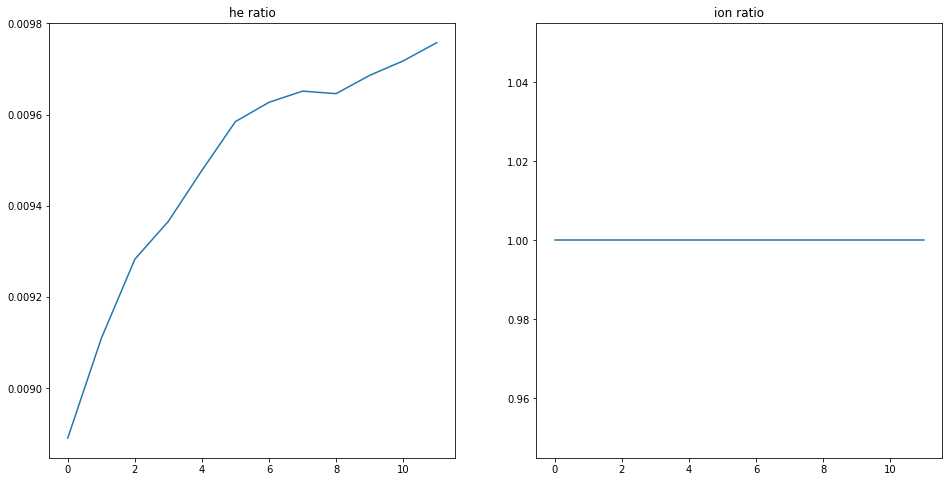

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(he_ratios)
axes[1].plot(ion_ratios)
axes[0].set_title('he ratio')
axes[1].set_title('ion ratio')
plt.savefig('species_ratios.png')

In [9]:
tt = 0
rho_e1 = -getH5Grid(root, 'tfd_moments', 'rho_e', tt, corner=corner, dims=globalDims)[:,:,0]
rho_he1 = -getH5Grid(root, 'tfd_moments', 'rho_he_e', tt, corner=corner, dims=globalDims)[:,:,0]
rho_i = getH5Grid(root, 'tfd_moments', 'rho_i', tt, corner=corner, dims=globalDims)[:,:,0]
Txxe = getH5Grid(root, 'tfd_moments', 'txx_e', tt, corner=corner, dims=globalDims)[:,:,0]
Tyye = getH5Grid(root, 'tfd_moments', 'tyy_e', tt, corner=corner, dims=globalDims)[:,:,0]
Tzze = getH5Grid(root, 'tfd_moments', 'tzz_e', tt, corner=corner, dims=globalDims)[:,:,0]
Txxhe = getH5Grid(root, 'tfd_moments', 'txx_he_e', tt, corner=corner, dims=globalDims)[:,:,0]
Tyyhe = getH5Grid(root, 'tfd_moments', 'tyy_he_e', tt, corner=corner, dims=globalDims)[:,:,0]
Tzzhe = getH5Grid(root, 'tfd_moments', 'tzz_he_e', tt, corner=corner, dims=globalDims)[:,:,0]


Loading rho_e from File: tfd_moments.000000.xdmf
Loading rho_he_e from File: tfd_moments.000000.xdmf
Loading rho_i from File: tfd_moments.000000.xdmf
Loading txx_e from File: tfd_moments.000000.xdmf
Loading tyy_e from File: tfd_moments.000000.xdmf
Loading tzz_e from File: tfd_moments.000000.xdmf
Loading txx_he_e from File: tfd_moments.000000.xdmf
Loading tyy_he_e from File: tfd_moments.000000.xdmf
Loading tzz_he_e from File: tfd_moments.000000.xdmf


In [10]:
tt2 = 1
rho_e2 = -getH5Grid(root, 'tfd_moments', 'rho_e', tt2, corner=corner, dims=globalDims)[:,:,0]
rho_he2 = -getH5Grid(root, 'tfd_moments', 'rho_he_e', tt2, corner=corner, dims=globalDims)[:,:,0]
rho_i2 = getH5Grid(root, 'tfd_moments', 'rho_i', tt2, corner=corner, dims=globalDims)[:,:,0]
Txxe2 = getH5Grid(root, 'tfd_moments', 'txx_e', tt2, corner=corner, dims=globalDims)[:,:,0]
Tyye2 = getH5Grid(root, 'tfd_moments', 'tyy_e', tt2, corner=corner, dims=globalDims)[:,:,0]
Tzze2 = getH5Grid(root, 'tfd_moments', 'tzz_e', tt2, corner=corner, dims=globalDims)[:,:,0]
Txxhe2 = getH5Grid(root, 'tfd_moments', 'txx_he_e', tt2, corner=corner, dims=globalDims)[:,:,0]
Tyyhe2 = getH5Grid(root, 'tfd_moments', 'tyy_he_e', tt2, corner=corner, dims=globalDims)[:,:,0]
Tzzhe2 = getH5Grid(root, 'tfd_moments', 'tzz_he_e', tt2, corner=corner, dims=globalDims)[:,:,0]

Loading rho_e from File: tfd_moments.001000.xdmf
Loading rho_he_e from File: tfd_moments.001000.xdmf
Loading rho_i from File: tfd_moments.001000.xdmf
Loading txx_e from File: tfd_moments.001000.xdmf
Loading tyy_e from File: tfd_moments.001000.xdmf
Loading tzz_e from File: tfd_moments.001000.xdmf
Loading txx_he_e from File: tfd_moments.001000.xdmf
Loading tyy_he_e from File: tfd_moments.001000.xdmf
Loading tzz_he_e from File: tfd_moments.001000.xdmf


<ipython-input-11-fa601e27f942>:1: RuntimeWarning: invalid value encountered in true_divide
  trace1 = (Txxe + Tyye + Tzze)/(rho_e1)/3
<ipython-input-11-fa601e27f942>:2: RuntimeWarning: invalid value encountered in true_divide
  trace2 = (Txxe2 + Tyye2 + Tzze2)/(rho_e2)/3


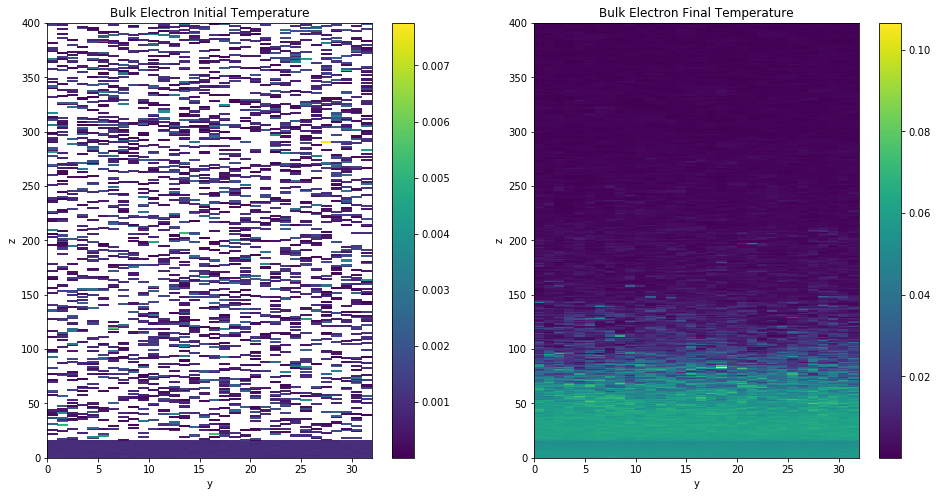

In [11]:
trace1 = (Txxe + Tyye + Tzze)/(rho_e1)/3
trace2 = (Txxe2 + Tyye2 + Tzze2)/(rho_e2)/3

fig, axes = plt.subplots(1,2)
pcm1=axes[0].pcolormesh(trace1)
pcm2=axes[1].pcolormesh(trace2)
axes[0].set_title('Bulk Electron Initial Temperature')
axes[1].set_title('Bulk Electron Final Temperature')
fig.colorbar(pcm1, ax=axes[0])
fig.colorbar(pcm2, ax=axes[1])
for i in range(2):
    axes[i].set_ylim(0,400)
    axes[i].set_ylabel('z')
    axes[i].set_xlabel('y')
plt.savefig('bulk-temp.png')

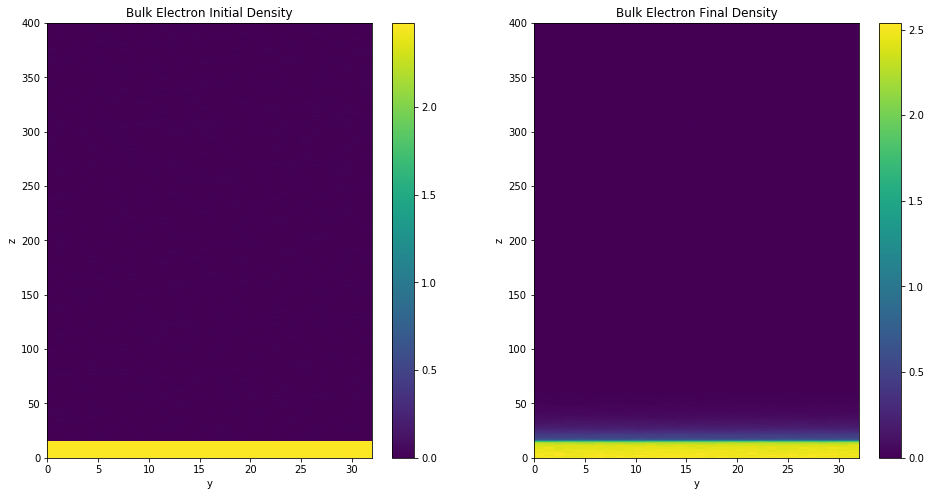

In [12]:
fig, axes = plt.subplots(1,2)
pcm1=axes[0].pcolormesh(rho_e1)
pcm2=axes[1].pcolormesh(rho_e2)
axes[0].set_title('Bulk Electron Initial Density')
axes[1].set_title('Bulk Electron Final Density')
fig.colorbar(pcm1, ax=axes[0])
fig.colorbar(pcm2, ax=axes[1])
for i in range(2):
    axes[i].set_ylim(0,400)
    axes[i].set_ylabel('z')
    axes[i].set_xlabel('y')
plt.savefig('bulk-density.png')

<ipython-input-13-52c9397800f6>:1: RuntimeWarning: invalid value encountered in true_divide
  tracehe1 = (Txxhe + Tyyhe + Tzzhe)/(rho_he1)/3
<ipython-input-13-52c9397800f6>:2: RuntimeWarning: invalid value encountered in true_divide
  tracehe2 = (Txxhe2 + Tyyhe2 + Tzzhe2)/(rho_he2)/3


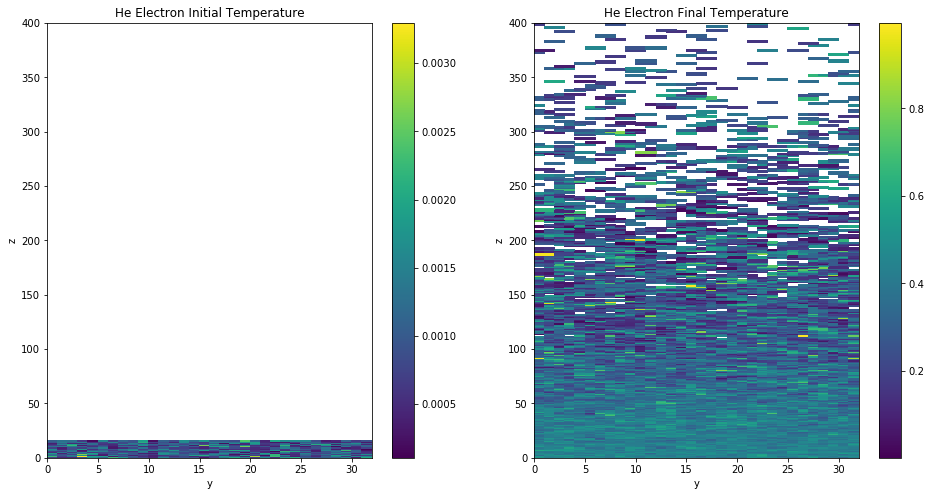

In [13]:
tracehe1 = (Txxhe + Tyyhe + Tzzhe)/(rho_he1)/3
tracehe2 = (Txxhe2 + Tyyhe2 + Tzzhe2)/(rho_he2)/3

fig, axes = plt.subplots(1,2)
pcm1=axes[0].pcolormesh(tracehe1)
pcm2=axes[1].pcolormesh(tracehe2)
axes[0].set_title('He Electron Initial Temperature')
axes[1].set_title('He Electron Final Temperature')
fig.colorbar(pcm1, ax=axes[0])
fig.colorbar(pcm2, ax=axes[1])
for i in range(2):
    axes[i].set_ylim(0,400)
    axes[i].set_ylabel('z')
    axes[i].set_xlabel('y')
plt.savefig('he-temp.png')

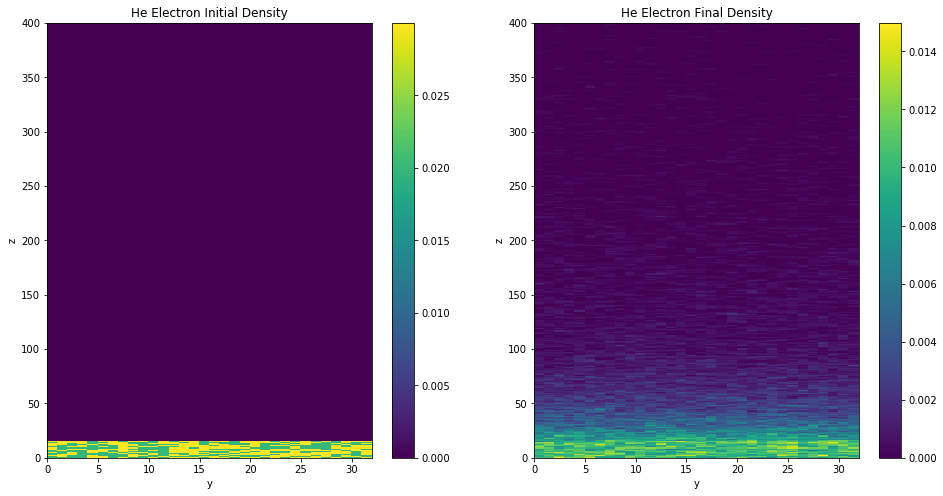

In [14]:
fig, axes = plt.subplots(1,2)
pcm1=axes[0].pcolormesh(rho_he1)
pcm2=axes[1].pcolormesh(rho_he2)
axes[0].set_title('He Electron Initial Density')
axes[1].set_title('He Electron Final Density')
fig.colorbar(pcm1, ax=axes[0])
fig.colorbar(pcm2, ax=axes[1])
for i in range(2):
    axes[i].set_ylim(0,400)
    axes[i].set_ylabel('z')
    axes[i].set_xlabel('y')
plt.savefig('he-density.png')

Px = getH5Grid(root, 'tfd_moments', 'px_he_e', time, corner=patch, dims=globalDims)#(box, box, box))
rho = -getH5Grid(root, 'tfd_moments', 'rho_he_e', time, corner=corner, dims=globalDims)#(box, box, box))
plt.pcolormesh(Txx, shading='gouraud')
rhoMean = np.mean(rho)
TxxMean = np.mean(Txx/rho)
PxMean = np.mean(Px)

vSqrMoment = Txx[:,:,0]/rho[:,:,0]

plt.title('$V_e^2$')
plt.imshow(np.log10(rho[:,:,0]), origin='lower')
plt.colorbar()
print(TxxMean)

In [ ]:
plt.title('$V_e^2$')
plt.plot(rho[:,1000,0])


## |V| Histogram

tcheck = '1000'

path = root + 'checkpoint_' + tcheck + '.bp'
patch = np.array(corner) + np.array((xp, yp, zp))
SC = SuperCell(path, patch, patches=numPatches, species='electron_he')
#print('temp', 1/TxxMean)

bins = 500
h = SC.histogramV(bins, log=True, dim='s')
plt.plot(h[1][1:], h[0])
plt.ylabel('count')
plt.xlabel('$|V|^2$')
plt.yscale('log')
plt.title(f'xp-{xp}-yp-{yp}-zp-{zp}-t{tcheck}')
#plt.savefig(f'histVsqr-xp-{xp}-yp-{yp}-zp-{zp+320}-t{tcheck}.png')

## grid histograms

bins = 300
for time in range(1000, 60000,1000):
    path = root + 'checkpoint_' + str(time) + '.bp'
    fig, axes = plt.subplots(nrows=nr, ncols=nc)
    for i in range(nr):
        for j in range(nc):
            patch = np.array(corner) + np.array((0, 192 + 96*i, 192 + 96*j))
            SC = SuperCell(path, patch, patches=numPatches, species='electron')
            h = SC.histogramV(bins, log=True, dim='s')
            axes[i,j].plot(h[1][1:], h[0])

            axes[i,j].set_title(f'$V^2$-T{time}')
            axes[i,j].set_ylabel('count')
            axes[i,j].set_xlabel('$V^2$')
            axes[i,j].set_yscale('log')
    plt.tight_layout()
    plt.savefig(f'hist-t{time}.png')
    plt.close()


## Fit
from scipy.optimize import curve_fit

def logarithmic_line(x, m, b):
    return np.exp(b)*np.exp(-x*m)
    
#hh = h[1]**0.5*np.exp(-h[1]/(0.8*TxxMean*2))*2e4
#hh = h[1]**0.5*np.exp(-h[1]/(0.006*2))*2.5e4
#plt.plot(h[1], hh, '-m',label='fake maxwellian' )
def straight_line(x, m, b):
    return -m*x+b

l1, r1 = 5, 30
l2, r2 = 50, 200
popt1, pcov1 = curve_fit( straight_line, h[1][ l1  : r1], np.log(h[0][l1 : r1] + 1e-5) )
popt2, pcov2 = curve_fit( straight_line, h[1][ l2  : r2], np.log(h[0][l2 : r2] + 1e-5) )


dummyline = np.arange(0,0.6,0.01)
#dummyline2 = np.arange(0.1, 0.3, 0.01)
plt.plot(dummyline, logarithmic_line(dummyline, *popt1), '-r', label=f'{popt1[0]:.2f}x+{popt1[1]:.2f}')
plt.plot(dummyline, logarithmic_line(dummyline, *popt2), '-b', label=f'{popt2[0]:.2f}x+{popt2[1]:.2f}')

plt.plot(h[1][1:],h[0], '+g', label='data')
plt.vlines((h[1][l1],h[1][r1]), ymin=1e0, ymax=3e5, color='r', linestyles='dashed', label='fit region red')
plt.vlines((h[1][l2],h[1][r2]), ymin=1e0, ymax=3e3, color='b', linestyles='dashed', label='fit region blue')
plt.yscale('log')
plt.ylabel('count')
plt.xlabel('$|V|^2$')
plt.title(f'xp-{xp}-yp-{yp}-zp-{zp+320}-t{tcheck}')
plt.legend()
#plt.savefig(f'Maxwellian-xp-{xp}-yp-{yp}-zp-{zp+320}-t{tcheck}.png')

## process to gif
import imageio
import os
image_folder = '.'#'images_tmp/yzplane'

images = [image_folder + '/' +  img for img in os.listdir(image_folder) if img.endswith(".png")]

images = sorted(images, key=lambda x: int(x.split('-t')[1].split('.')[0]))

image_data = []
for image in images:
    image_data.append(imageio.imread(image))
imageio.mimwrite('baseline-rho-he-negative-log.gif', image_data, format= '.gif', fps = 1)

